In [1]:
import seaborn as sns
import pandas
import gripql
conn = gripql.Connection("https://bmeg.io/api", credential_file="bmeg_credentials.json")
G = conn.graph("rc5")

Download gene expression values from TCGA-READ cohort and build matrix with submitter id as label

In [2]:
c = G.query().V("Project:TCGA-READ").out("cases").out("samples").as_("sample")
c = c.out("aliquots").out("gene_expressions").as_("exp")
c = c.render( ["$sample._data.gdc_attributes.submitter_id", "$exp._data.values"])

data = {}
for row in c.execute(stream=True):
    data[row[0]] = row[1]

[INFO]	2020-01-14 14:06:01,252	177 results received in 35 seconds


Take the data we downloaded and turn it into a Pandas data frame

In [3]:
samples = pandas.DataFrame(data).transpose().fillna(0.0)

Take a look at the top corner of the dataframe

In [4]:
samples.iloc[:5,:5]

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460
TCGA-G5-6233-01A,30.212803,0.063489,87.317567,6.237288,5.518520
TCGA-AG-4021-01A,80.356975,3.621759,48.649980,8.770929,8.975365
TCGA-EI-6514-01A,142.160017,2.460405,82.308962,4.144567,3.251904
TCGA-AG-3725-01A,81.611032,4.730710,56.783610,4.896992,4.208633
TCGA-AG-3725-11A,78.390851,1.037580,51.193885,6.455982,2.212233


Take a quick look to see the top expressing samples for the gene `ENSG00000000003`

In [5]:
samples["ENSG00000000003"].sort_values(ascending=False).head()

TCGA-DC-5869-01A    281.005900
TCGA-DC-6683-01A    258.010380
TCGA-AF-3913-01A    254.599210
TCGA-EF-5831-01A    253.774315
TCGA-DC-6157-01A    251.170374
Name: ENSG00000000003, dtype: float64

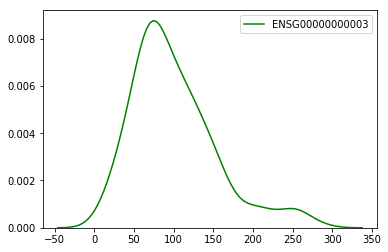

In [6]:
sns.kdeplot(samples['ENSG00000000003'], color="g")